## Setup

In [36]:
!pip install kaggle
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install seaborn

In [ ]:
import opendatasets as od
 
od.download("https://www.kaggle.com/datasets/stackoverflow/stacksample/")


In [1]:
import pandas as pd
from io import StringIO

In [2]:
# Importing the Questions.csv file

questions_df = pd.read_csv('stacksample/Questions.csv', encoding = "ISO-8859-1")
questions_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [3]:
# Importing the Answers.csv file

answers_df = pd.read_csv('stacksample/Answers.csv', encoding = "ISO-8859-1")
answers_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
# Removing the Tags.csv file beacuse we don't need it
import os

os.remove("stacksample/Tags.csv")

## Data preprocessing

In [4]:
## Grouping answers by ParentId and calculating the sum of scores from Answers
total_answers_score = answers_df.groupby('ParentId')['Score'].sum().reset_index()
total_answers_score.rename(columns={'Score': 'TotalAnswersScore', 'ParentId': 'Id'}, inplace=True)

merged_df = questions_df.merge(total_answers_score, on='Id', how='left')

merged_df['TotalAnswersScore'] = merged_df['TotalAnswersScore'].fillna(0)

merged_df['Closed'] = merged_df['ClosedDate'].notnull()

columns_to_remove = ['OwnerUserId', 'CreationDate', 'ClosedDate']
merged_df = merged_df.drop(columns=columns_to_remove)

# Saving the merged data to a new CSV file
prosessed_file_path = './Questions_with_TotalAnswersScore.csv'
merged_df.to_csv(prosessed_file_path, index=False)

### Clean Ram

In [ ]:
import gc 
gc.collect()
del questions_df
del answers_df
del merged_df

### Read procesed data

In [3]:
# Run if you have already downloaded the dataset and processed it

import pandas as pd
from io import StringIO

prosessed_file_path = './Questions_with_TotalAnswersScore.csv'

### To speed up development, you can use smaller set for faster results and testing phase

In [6]:
import pandas as pd

answers_df = pd.read_csv('./Questions_with_TotalAnswersScore.csv', encoding="ISO-8859-1")

first_10000_rows = answers_df.head(10000)

first_10000_rows.to_csv('./First_10000_Questions_with_TotalAnswersScore.csv', index=False)

test_prosessed_file_path = './First_10000_Questions_with_TotalAnswersScore.csv';

In [7]:
import pandas as pd
from io import StringIO

modified_qustions_df = pd.read_csv(prosessed_file_path, encoding = "ISO-8859-1")
modified_qustions_df.head()

,Id,Score,Title,Body,TotalAnswersScore,Closed
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,19.0,False
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,34.0,True
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,9.0,False
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,54.0,False
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,63.0,False


# Data analysis

In [8]:
import os
import matplotlib.pyplot as plt

data_analysis_path = './data_analysis/'
if not os.path.exists(data_analysis_path):
    os.makedirs(data_analysis_path)


### Statistics of length of questions title and body

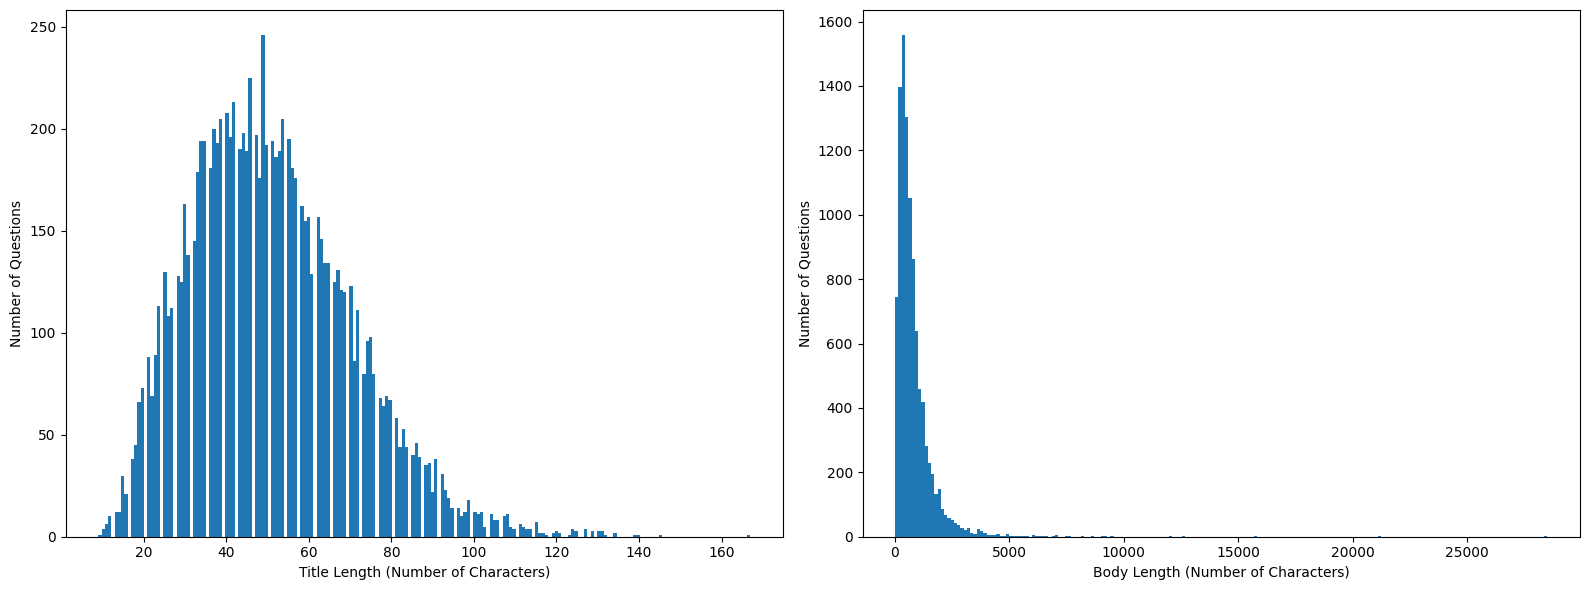

Title mean characters count: 51.033
Title median characters count: 49.0
Title min characters count: 9
Title max characters count: 167

Body mean characters count: 813.384
Body median characters count: 592.0
Body min characters count: 23
Body max characters count: 28505


In [9]:
# calculating lenght of title and body
modified_qustions_df['TitleLength'] = modified_qustions_df['Title'].str.len()
modified_qustions_df['BodyLength'] = modified_qustions_df['Body'].str.len()

# plotting the distribution of TitleLength and BodyLength
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(modified_qustions_df['TitleLength'], bins=200)
plt.xlabel('Title Length (Number of Characters)')
plt.ylabel('Number of Questions')

plt.subplot(1, 2, 2)
plt.hist(modified_qustions_df['BodyLength'], bins=200)
plt.xlabel('Body Length (Number of Characters)')
plt.ylabel('Number of Questions')

plt.tight_layout()

plt.savefig(data_analysis_path + 'title_body_length_distribution.png', dpi=300)
plt.show()

# printing the mean and median of TitleLength and BodyLength
print('Title mean characters count: {:.3f}'.format(modified_qustions_df['TitleLength'].mean()))
print('Title median characters count: {}'.format(modified_qustions_df['TitleLength'].median()))
print('Title min characters count: {}'.format(modified_qustions_df['TitleLength'].min()))
print('Title max characters count: {}'.format(modified_qustions_df['TitleLength'].max()))
print('')
print('Body mean characters count: {:.3f}'.format(modified_qustions_df['BodyLength'].mean()))
print('Body median characters count: {}'.format(modified_qustions_df['BodyLength'].median()))
print('Body min characters count: {}'.format(modified_qustions_df['BodyLength'].min()))
print('Body max characters count: {}'.format(modified_qustions_df['BodyLength'].max()))

### Statistics words count of questions title and body

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/marcin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


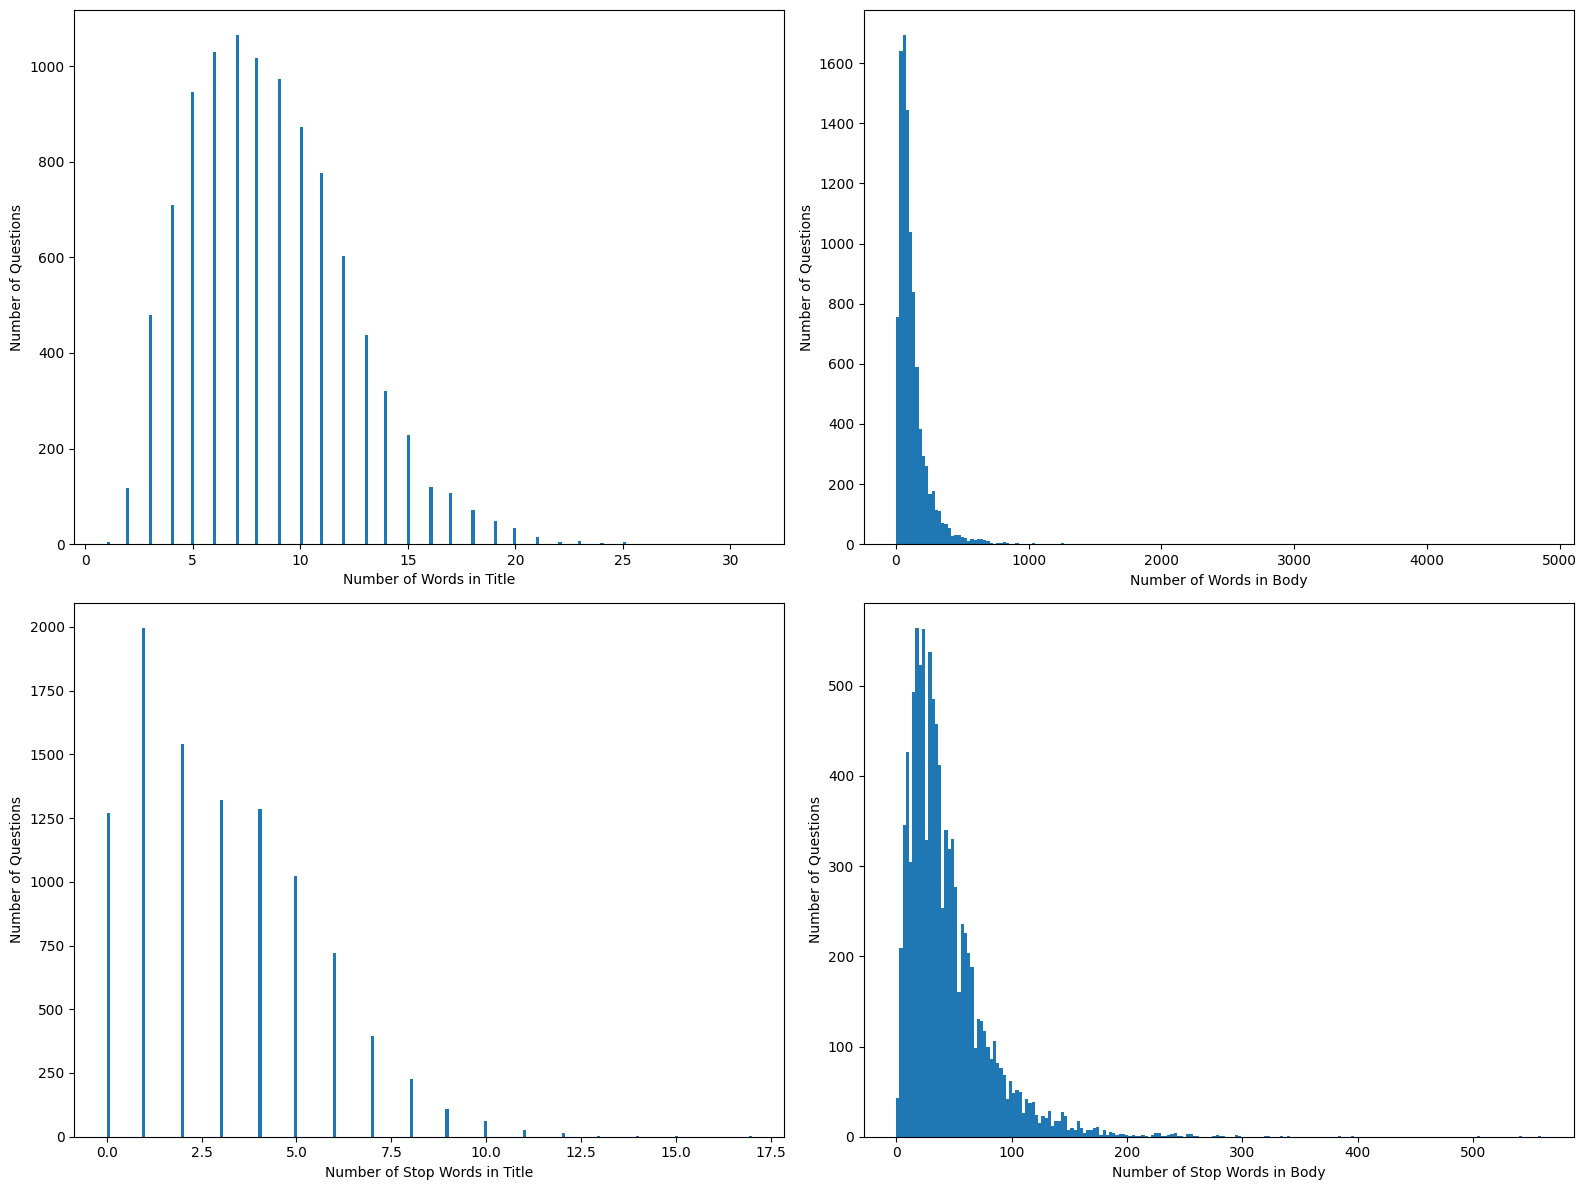

Title mean words count: 8.537
Title median words count: 8.0
Title min words count: 1
Title max words count: 31

Body mean words count: 127.109
Body median words count: 89.0
Body min words count: 1
Body max words count: 4863

Title mean stop words count: 3.040
Title median stop words count: 3.0
Title min stop words count: 0
Title max stop words count: 17

Body mean stop words count: 44.112
Body median stop words count: 35.0
Body min stop words count: 0
Body max stop words count: 559


In [10]:
# preparing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

modified_qustions_df['NumberOfTitleWords'] = modified_qustions_df['Title'].apply(lambda x: len(str(x).split(" ")))
modified_qustions_df['NumberOfBodyWords'] = modified_qustions_df['Body'].apply(lambda x: len(str(x).split(" ")))

modified_qustions_df['NumberOfTitleStopWords'] = modified_qustions_df['Title'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
modified_qustions_df['NumberOfBodyStopWords'] = modified_qustions_df['Body'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

# plotting the distribution of NumberOfTitleWords and NumberOfBodyWords and NumberOfTitleStopWords and NumberOfBodyStopWords
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.hist(modified_qustions_df['NumberOfTitleWords'], bins=200)
plt.xlabel('Number of Words in Title')
plt.ylabel('Number of Questions')

plt.subplot(2, 2, 2)
plt.hist(modified_qustions_df['NumberOfBodyWords'], bins=200)
plt.xlabel('Number of Words in Body')
plt.ylabel('Number of Questions')

plt.subplot(2, 2, 3)
plt.hist(modified_qustions_df['NumberOfTitleStopWords'], bins=200)
plt.xlabel('Number of Stop Words in Title')
plt.ylabel('Number of Questions')

plt.subplot(2, 2, 4)
plt.hist(modified_qustions_df['NumberOfBodyStopWords'], bins=200)
plt.xlabel('Number of Stop Words in Body')
plt.ylabel('Number of Questions')

plt.tight_layout()
plt.savefig(data_analysis_path + 'title_body_words_distribution.png', dpi=300)
plt.show()

# printing the mean and median of NumberOfTitleWords and NumberOfBodyWords and NumberOfTitleStopWords and NumberOfBodyStopWords 
print('Title mean words count: {:.3f}'.format(modified_qustions_df['NumberOfTitleWords'].mean()))
print('Title median words count: {}'.format(modified_qustions_df['NumberOfTitleWords'].median()))
print('Title min words count: {}'.format(modified_qustions_df['NumberOfTitleWords'].min()))
print('Title max words count: {}'.format(modified_qustions_df['NumberOfTitleWords'].max()))
print('')
print('Body mean words count: {:.3f}'.format(modified_qustions_df['NumberOfBodyWords'].mean()))
print('Body median words count: {}'.format(modified_qustions_df['NumberOfBodyWords'].median()))
print('Body min words count: {}'.format(modified_qustions_df['NumberOfBodyWords'].min()))
print('Body max words count: {}'.format(modified_qustions_df['NumberOfBodyWords'].max()))
print('')
print('Title mean stop words count: {:.3f}'.format(modified_qustions_df['NumberOfTitleStopWords'].mean()))
print('Title median stop words count: {}'.format(modified_qustions_df['NumberOfTitleStopWords'].median()))
print('Title min stop words count: {}'.format(modified_qustions_df['NumberOfTitleStopWords'].min()))
print('Title max stop words count: {}'.format(modified_qustions_df['NumberOfTitleStopWords'].max()))
print('')
print('Body mean stop words count: {:.3f}'.format(modified_qustions_df['NumberOfBodyStopWords'].mean()))
print('Body median stop words count: {}'.format(modified_qustions_df['NumberOfBodyStopWords'].median()))
print('Body min stop words count: {}'.format(modified_qustions_df['NumberOfBodyStopWords'].min()))
print('Body max stop words count: {}'.format(modified_qustions_df['NumberOfBodyStopWords'].max()))

### Statistics on the number of special characters in titles and bodies of questions

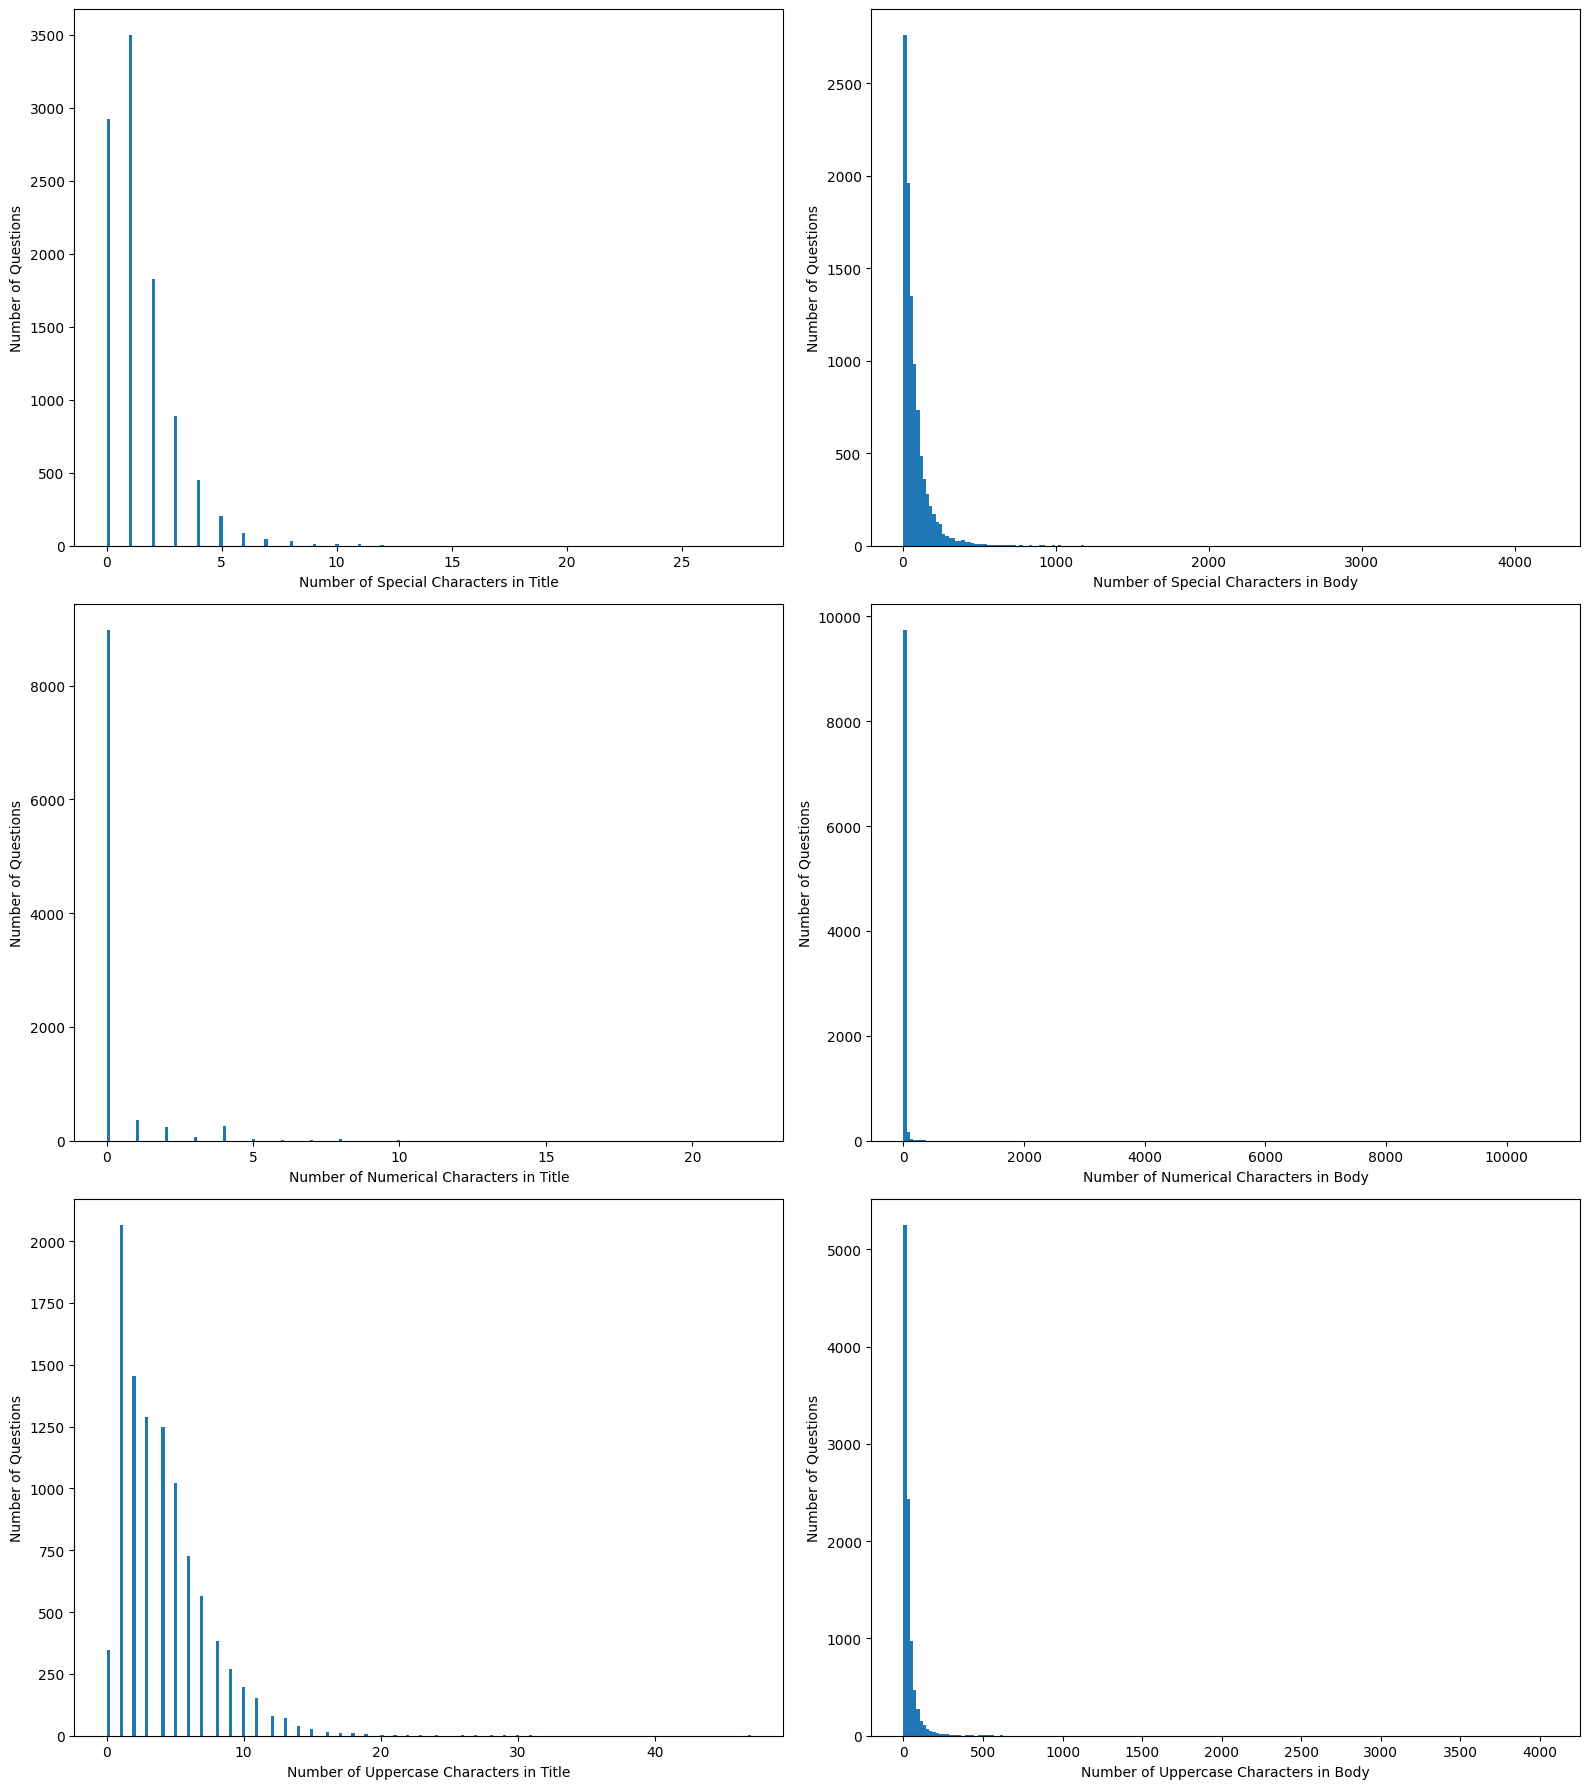

Title mean special characters count: 1.422
Title median special characters count: 1.0
Title min special characters count: 0
Title max special characters count: 28

Body mean special characters count: 83.163
Body median special characters count: 51.0
Body min special characters count: 5
Body max special characters count: 4215

Title mean numerical characters count: 0.276
Title median numerical characters count: 0.0
Title min numerical characters count: 0
Title max numerical characters count: 22

Body mean numerical characters count: 9.337
Body median numerical characters count: 1.0
Body min numerical characters count: 0
Body max numerical characters count: 10684

Title mean uppercase characters count: 4.048
Title median uppercase characters count: 3.0
Title min uppercase characters count: 0
Title max uppercase characters count: 47

Body mean uppercase characters count: 35.111
Body median uppercase characters count: 19.0
Body min uppercase characters count: 0
Body max uppercase character

In [11]:
# calculating the number special characters in Title and Body
list_of_special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '-', '+', '=', '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '?', '/', '~', '`']
modified_qustions_df['NumberOfTitleSpecialCharacters'] = modified_qustions_df['Title'].apply(lambda x: len([char for char in str(x) if char in list_of_special_characters]))
modified_qustions_df['NumberOfBodySpecialCharacters'] = modified_qustions_df['Body'].apply(lambda x: len([char for char in str(x) if char in list_of_special_characters]))

# calculating the number of numerical characters in Title and Body
modified_qustions_df['NumberOfTitleNumericalCharacters'] = modified_qustions_df['Title'].apply(lambda x: len([char for char in str(x) if char.isnumeric()]))
modified_qustions_df['NumberOfBodyNumericalCharacters'] = modified_qustions_df['Body'].apply(lambda x: len([char for char in str(x) if char.isnumeric()]))

# calculating the number of uppercase characters in Title and Body
modified_qustions_df['NumberOfTitleUpperCaseCharacters'] = modified_qustions_df['Title'].apply(lambda x: len([char for char in str(x) if char.isupper()]))
modified_qustions_df['NumberOfBodyUpperCaseCharacters'] = modified_qustions_df['Body'].apply(lambda x: len([char for char in str(x) if char.isupper()]))

# plotting the distribution
plt.figure(figsize=(16, 18))

plt.subplot(3, 2, 1)
plt.hist(modified_qustions_df['NumberOfTitleSpecialCharacters'], bins=200)
plt.xlabel('Number of Special Characters in Title')
plt.ylabel('Number of Questions')

plt.subplot(3, 2, 2)
plt.hist(modified_qustions_df['NumberOfBodySpecialCharacters'], bins=200)
plt.xlabel('Number of Special Characters in Body')
plt.ylabel('Number of Questions')

plt.subplot(3, 2, 3)
plt.hist(modified_qustions_df['NumberOfTitleNumericalCharacters'], bins=200)
plt.xlabel('Number of Numerical Characters in Title')
plt.ylabel('Number of Questions')

plt.subplot(3, 2, 4)
plt.hist(modified_qustions_df['NumberOfBodyNumericalCharacters'], bins=200)
plt.xlabel('Number of Numerical Characters in Body')
plt.ylabel('Number of Questions')

plt.subplot(3, 2, 5)
plt.hist(modified_qustions_df['NumberOfTitleUpperCaseCharacters'], bins=200)
plt.xlabel('Number of Uppercase Characters in Title')
plt.ylabel('Number of Questions')

plt.subplot(3, 2, 6)
plt.hist(modified_qustions_df['NumberOfBodyUpperCaseCharacters'], bins=200)
plt.xlabel('Number of Uppercase Characters in Body')
plt.ylabel('Number of Questions')

plt.tight_layout()
plt.savefig(data_analysis_path + 'title_body_special_numerical_uppercase_characters_distribution.png', dpi=300)
plt.show()

# printing the mean and median values
print('Title mean special characters count: {:.3f}'.format(modified_qustions_df['NumberOfTitleSpecialCharacters'].mean()))
print('Title median special characters count: {}'.format(modified_qustions_df['NumberOfTitleSpecialCharacters'].median()))
print('Title min special characters count: {}'.format(modified_qustions_df['NumberOfTitleSpecialCharacters'].min()))
print('Title max special characters count: {}'.format(modified_qustions_df['NumberOfTitleSpecialCharacters'].max()))
print('')
print('Body mean special characters count: {:.3f}'.format(modified_qustions_df['NumberOfBodySpecialCharacters'].mean()))
print('Body median special characters count: {}'.format(modified_qustions_df['NumberOfBodySpecialCharacters'].median()))
print('Body min special characters count: {}'.format(modified_qustions_df['NumberOfBodySpecialCharacters'].min()))
print('Body max special characters count: {}'.format(modified_qustions_df['NumberOfBodySpecialCharacters'].max()))
print('')
print('Title mean numerical characters count: {:.3f}'.format(modified_qustions_df['NumberOfTitleNumericalCharacters'].mean()))
print('Title median numerical characters count: {}'.format(modified_qustions_df['NumberOfTitleNumericalCharacters'].median()))
print('Title min numerical characters count: {}'.format(modified_qustions_df['NumberOfTitleNumericalCharacters'].min()))
print('Title max numerical characters count: {}'.format(modified_qustions_df['NumberOfTitleNumericalCharacters'].max()))
print('')
print('Body mean numerical characters count: {:.3f}'.format(modified_qustions_df['NumberOfBodyNumericalCharacters'].mean()))
print('Body median numerical characters count: {}'.format(modified_qustions_df['NumberOfBodyNumericalCharacters'].median()))
print('Body min numerical characters count: {}'.format(modified_qustions_df['NumberOfBodyNumericalCharacters'].min()))
print('Body max numerical characters count: {}'.format(modified_qustions_df['NumberOfBodyNumericalCharacters'].max()))
print('')
print('Title mean uppercase characters count: {:.3f}'.format(modified_qustions_df['NumberOfTitleUpperCaseCharacters'].mean()))
print('Title median uppercase characters count: {}'.format(modified_qustions_df['NumberOfTitleUpperCaseCharacters'].median()))
print('Title min uppercase characters count: {}'.format(modified_qustions_df['NumberOfTitleUpperCaseCharacters'].min()))
print('Title max uppercase characters count: {}'.format(modified_qustions_df['NumberOfTitleUpperCaseCharacters'].max()))
print('')
print('Body mean uppercase characters count: {:.3f}'.format(modified_qustions_df['NumberOfBodyUpperCaseCharacters'].mean()))
print('Body median uppercase characters count: {}'.format(modified_qustions_df['NumberOfBodyUpperCaseCharacters'].median()))
print('Body min uppercase characters count: {}'.format(modified_qustions_df['NumberOfBodyUpperCaseCharacters'].min()))
print('Body max uppercase characters count: {}'.format(modified_qustions_df['NumberOfBodyUpperCaseCharacters'].max()))

### List of most common words in questions title and body

In [12]:
MostFreqWordsTitle = pd.Series(' '.join(modified_qustions_df['Title']).split()).value_counts()[:20]
MostFreqWordsBody = pd.Series(' '.join(modified_qustions_df['Body']).split()).value_counts()[:20]
# its probably better to remove the stop words before calculating the most frequent words

print('Most frequent words in Title: \n', MostFreqWordsTitle)
print('')
print('Most frequent words in Body: \n', MostFreqWordsBody)

Most frequent words in Title: 
 a        3163
to       3085
in       2707
How      2026
the      1797
I        1198
of       1144
for      1096
and       915
with      884
do        857
from      710
is        676
an        651
on        631
What      569
using     479
can       465
Is        442
-         406
Name: count, dtype: int64

Most frequent words in Body: 
 the              48258
to               35932
a                28738
I                22828
and              16996
is               15734
of               15612
in               14316
that             12869
it                9580
for               9414
have              8643
=                 7932
this              7854
be                7111
with              6843
on                6831
<p>I              6716
but               5973
</code></pre>     5663
Name: count, dtype: int64


### List of rare words in questions title and body

In [13]:
RareWordsTitle = pd.Series(' '.join(modified_qustions_df['Title']).split()).value_counts()[-20:]
RareWordsBody = pd.Series(' '.join(modified_qustions_df['Body']).split()).value_counts()[-20:]
# its probably better to remove the stop words before calculating the rare words

print('Rare words in Title: \n', RareWordsTitle)
print('')
print('Rare words in Body: \n', RareWordsBody)

Rare words in Title: 
 getch()                       1
Folders                       1
Timeout                       1
themselves                    1
societal                      1
CreateProcess                 1
AspectJ:                      1
pointcut                      1
driver?                       1
Request                       1
unfocused                     1
Aborted"                      1
falling                       1
lookup?                       1
cmdlets?                      1
System.Collections.Generic    1
Causes                        1
Sleeping                      1
non-compliant                 1
switch-case                   1
Name: count, dtype: int64

Rare words in Body: 
 div?                                                                                   1
aligns                                                                                 1
border="0"&gt;&lt;/a&gt;                                                               1
src="..."            

### Statistics of score

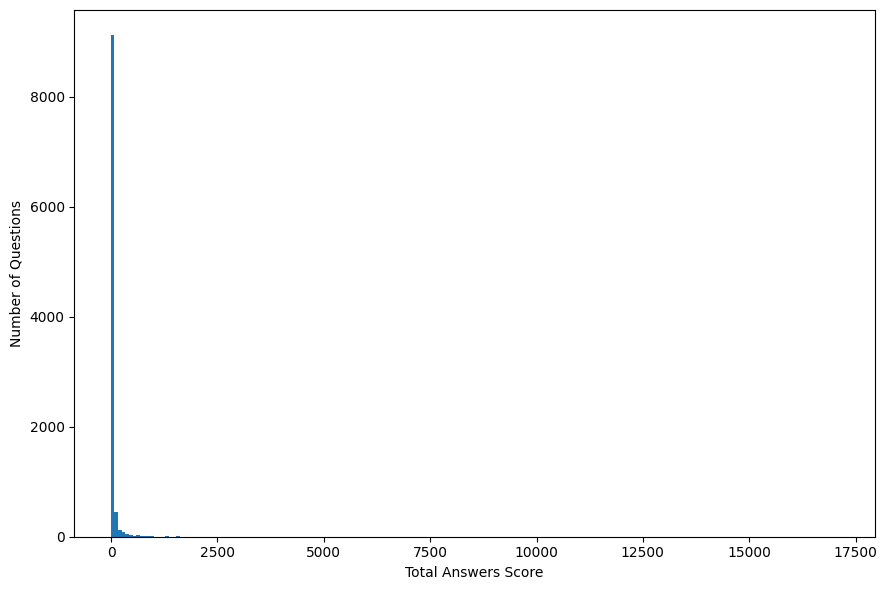

Total Answers Score mean: 41.273
Total Answers Score median: 8.0
Total Answers Score max: 17099.0
Total Answers Score min: -7.0


In [14]:
plt.figure(figsize=(9, 6))
plt.hist(modified_qustions_df['TotalAnswersScore'], bins=200)
plt.xlabel('Total Answers Score')
plt.ylabel('Number of Questions')

plt.tight_layout()
plt.savefig(data_analysis_path + 'total_answers_score_distribution.png', dpi=300)
plt.show()

# printing the mean, media, max and min values
print('Total Answers Score mean: {:.3f}'.format(modified_qustions_df['TotalAnswersScore'].mean()))
print('Total Answers Score median: {}'.format(modified_qustions_df['TotalAnswersScore'].median()))
print('Total Answers Score max: {}'.format(modified_qustions_df['TotalAnswersScore'].max()))
print('Total Answers Score min: {}'.format(modified_qustions_df['TotalAnswersScore'].min()))

### Normalize & Convert text with TF-IDF

In [56]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text


tfidf_title = TfidfVectorizer(max_features=500)
title_tfidf = tfidf_title.fit_transform(modified_qustions_df['Title'].astype(str).apply(normalize_text))
title_tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf_title.get_feature_names_out())

tfidf_body = TfidfVectorizer(max_features=500)
body_tfidf = tfidf_body.fit_transform(modified_qustions_df['Body'].astype(str).apply(normalize_text))
body_tfidf_df = pd.DataFrame(body_tfidf.toarray(), columns=tfidf_body.get_feature_names_out())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marcin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Correlation matrix

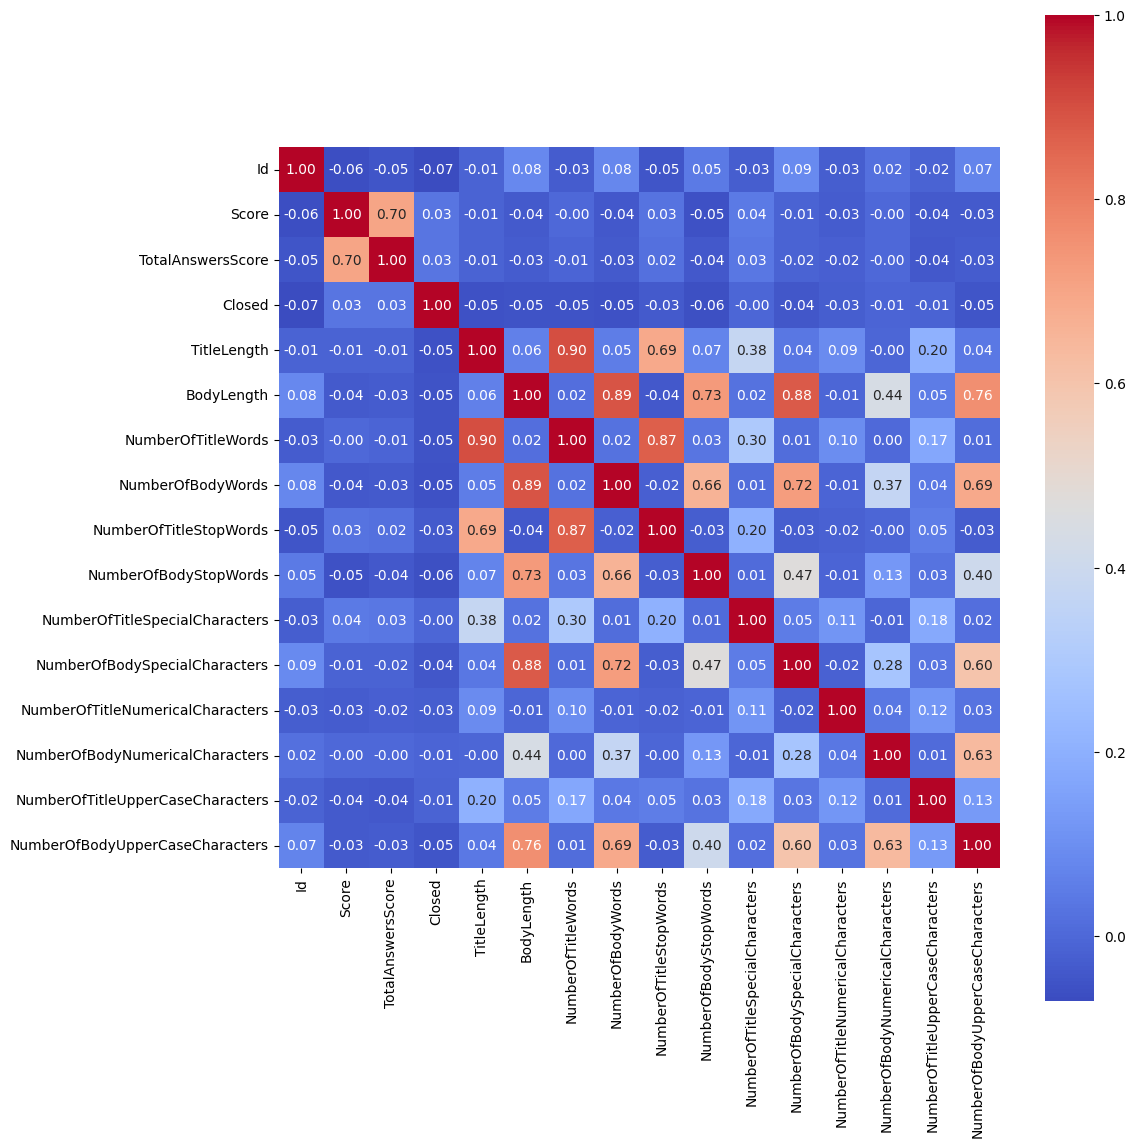

In [27]:
import seaborn as sns

# generate correlation matrix
correlation_matrix = modified_qustions_df.corr(numeric_only=True)

# plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig(data_analysis_path + 'correlation_matrix.png', dpi=300)
plt.show()

### Prepare sets for training, validation, testing

In [33]:
modified_qustions_df.head()

,Id,Score,Title,Body,TotalAnswersScore,Closed,TitleLength,BodyLength,NumberOfTitleWords,NumberOfBodyWords,NumberOfTitleStopWords,NumberOfBodyStopWords,NumberOfTitleSpecialCharacters,NumberOfBodySpecialCharacters,NumberOfTitleNumericalCharacters,NumberOfBodyNumericalCharacters,NumberOfTitleUpperCaseCharacters,NumberOfBodyUpperCaseCharacters
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,19.0,False,58,1941,7,293,1,28,4,202,0,11,4,147
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,34.0,True,53,249,7,24,2,8,1,36,0,2,5,8
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,9.0,False,17,431,3,54,0,16,1,46,0,0,8,26
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,54.0,False,34,260,5,41,1,18,0,22,0,0,1,6
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,63.0,False,51,1190,6,169,1,77,1,108,0,7,4,40


In [57]:
X_combined = pd.concat([modified_qustions_df.drop(['Title', 'Body', 'Id'], axis=1), title_tfidf_df, body_tfidf_df], axis=1)

In [58]:
X_combined.head()

,Score,TotalAnswersScore,Closed,TitleLength,BodyLength,NumberOfTitleWords,NumberOfBodyWords,NumberOfTitleStopWords,NumberOfBodyStopWords,NumberOfTitleSpecialCharacters,...,work,working,would,write,writing,written,wrong,xml,year,yet
0,26,19.0,False,58,1941,7,293,1,28,4,...,0.0,0.000000,0.000000,0.000000,0.0,0.075886,0.0,0.000000,0.0,0.0
1,144,34.0,True,53,249,7,24,2,8,1,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,21,9.0,False,17,431,3,54,0,16,1,...,0.0,0.164274,0.000000,0.000000,0.0,0.000000,0.0,0.209432,0.0,0.0
3,53,54.0,False,34,260,5,41,1,18,0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,49,63.0,False,51,1190,6,169,1,77,1,...,0.0,0.000000,0.125261,0.105573,0.0,0.125994,0.0,0.000000,0.0,0.0


In [59]:
from sklearn.model_selection import train_test_split

x = X_combined.drop('Score', axis=1)
y = modified_qustions_df['Score']

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



### Training AI

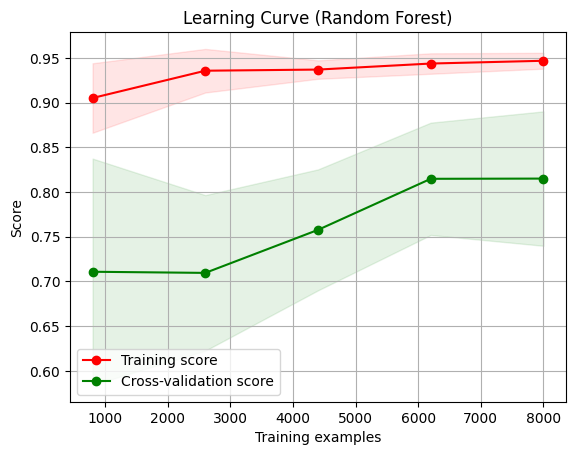

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

plot_learning_curve(regressor, "Learning Curve (Random Forest)", X, y, cv=5, n_jobs=4)
plt.show()
